<a href="https://colab.research.google.com/github/145002/CuadernosParalera/blob/main/Ralexs_Cuaderno_de_grafico_de_lineas_dda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Nacional de San Antonio del Cusco

Departamento Académico de Informática

Algoritmos Paralelos y Distribuidos

**Guia Practica - Grafica de Lineas**

Docente: Dra. Roxana Lisette Quintanilla Portugal

**Prerequisitos**: Importar biblioteca para ploteo de imagenes

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 234 µs (started: 2021-03-31 03:20:26 +00:00)


Este codigo permite dibujar una linea teniendo ya todos las coordenadas en dos arreglos, a1 y a2. Sin embargo la libreria no permite ver a nivel de pixel. Vea que al establecer los limites de x & y en 2, la libreria renderiza el canvas para dar mayor granularidad entre punto y punto de las coordenadas.


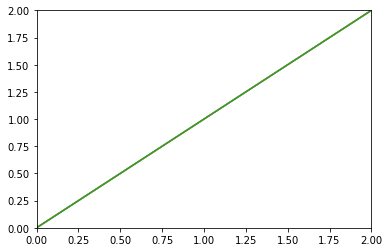

time: 211 ms (started: 2021-03-31 03:20:29 +00:00)


In [ ]:
a1 = [0, 1, 2]
a2 = [0, 1, 2]

for i in range(3):
    plt.xlim(right=2) 
    plt.ylim(top=2)
    plt.plot(a1,a2,)

plt.show()

Investigamos otra libreria de graficos (pillow) que permitiría imprimir por pixel


In [ ]:
 pip install Pillow

time: 2.93 s (started: 2021-03-31 03:20:33 +00:00)


El procedimiendo de Pillow es crear un canvas que luego servira de lienzo para dibujar por encima (puntos, lineas, etc). El codigo a seguir muestra los pasos 1-2 para crear y guardar el canvas. Los pasos 3-4 sirven para el ploteo; asi, es importante notar que la libreria Pillow, en el paso 3, solamente abre la imagen. En el paso 4, haciendo uso de la libreria matplotlib.pyplot, se realiza el ploteo en si.


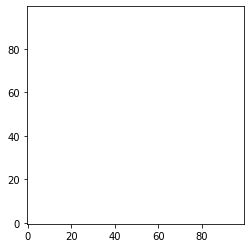

time: 200 ms (started: 2021-03-31 04:26:09 +00:00)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

#1. dibujar canvas
blank_image = Image.new('RGB', (100, 100), 'white')
img_draw = ImageDraw.Draw(blank_image)

#2. guardar la imagen
blank_image.save('blank_image.jpg')

#3. abrir la imagen utilizando el nombre que ya esta en la ruta por defecto del Colab
img = Image.open('blank_image.jpg')

#4. Como plt sabe cómo manejar la instancia de la clase Image, simplemente ingrese su imagen cargada al método imshow
plt.imshow(img, origin="lower")


Algoritmo DDA

10000 loops, best of 5: 34.2 µs per loop


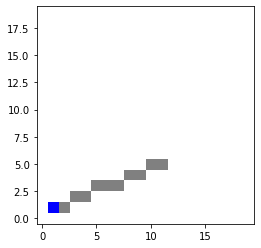

time: 2.37 s (started: 2021-03-31 03:20:41 +00:00)


In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5) #x=2+0.5 y=1.4+0.5 -> 1.1
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length #1+1 = 2
  iy = dy/length #1+0.4 = 1.4

  #4. asignar los puntos de inicio
  x,y = x0,y0 #1,1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(1,1, 11,5, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')



• PENDIENTE m>1

10000 loops, best of 5: 30.2 µs per loop


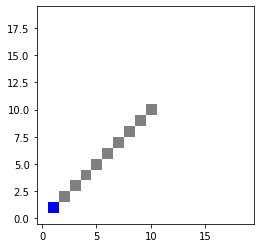

time: 2.1 s (started: 2021-03-31 03:20:46 +00:00)


In [ ]:
# m>1
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5) #x=2+0.5 y=1.4+0.5 -> 1.1
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length #1+1 = 2
  iy = dy/length #1+0.4 = 1.4

  #4. asignar los puntos de inicio
  x,y = x0,y0 #1,1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(1,1, 10,10, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')

• PENDIENTE m<1

10000 loops, best of 5: 31.4 µs per loop


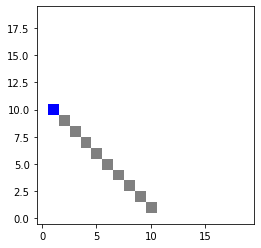

time: 2.16 s (started: 2021-03-31 03:20:51 +00:00)


In [ ]:
# m<1
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5) #x=2+0.5 y=1.4+0.5 -> 1.1
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length #1+1 = 2
  iy = dy/length #1+0.4 = 1.4

  #4. asignar los puntos de inicio
  x,y = x0,y0 #1,1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(1,10, 10,1, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')

• PENDIENTE m = vertical

10000 loops, best of 5: 30.1 µs per loop


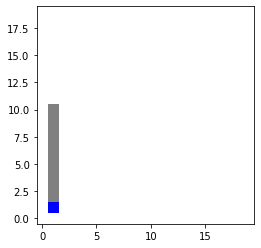

time: 2.13 s (started: 2021-03-31 03:20:56 +00:00)


In [ ]:
# m vertical
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5) #x=2+0.5 y=1.4+0.5 -> 1.1
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length #1+1 = 2
  iy = dy/length #1+0.4 = 1.4

  #4. asignar los puntos de inicio
  x,y = x0,y0 #1,1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(1,1, 1,10, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')

• PENDIENTE m = horizontal

10000 loops, best of 5: 31.6 µs per loop


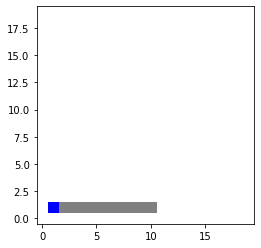

time: 2.21 s (started: 2021-03-31 03:21:03 +00:00)


In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5) #x=2+0.5 y=1.4+0.5 -> 1.1
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length #1+1 = 2
  iy = dy/length #1+0.4 = 1.4

  #4. asignar los puntos de inicio
  x,y = x0,y0 #1,1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(1,1, 10,1, img_draw)

#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')



**Ejercicio en clase**

Grafique 2 lineas donde se cumpla que:

Si | m | < 1, la línea es más horizontal que vertical.
Según tiende a cero m, la línea tiende a ser horizontal.

Si | m | > 1, la línea es más vertical que horizontal.
Según tiende a infinito m, la línea tiende a ser vertical.

Compare el tiempo de ejecución en ambas situaciones y justifique porque uno demora más que el otro. Además, para ayudar en su respuesta, Grafique una linea completamente vertical. 


En este caso el tiempo de ejecucion en la primera para m>1 es 30.1 µs y para m<1 es 29.8 µs.
por lo tanto mientras la pendiente sea menor el tiempo de ejecucion sera menos.

**Ejercicio Propuesto**
Escribir un programa para dibujar 5 líneas al azar. Luego el programa debe señalar los puntos de intersección.

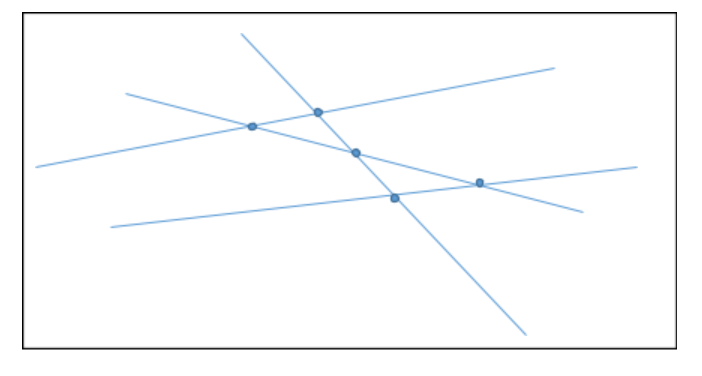

1000 loops, best of 5: 222 µs per loop
1000 loops, best of 5: 254 µs per loop
10000 loops, best of 5: 202 µs per loop
10000 loops, best of 5: 185 µs per loop
1000 loops, best of 5: 271 µs per loop


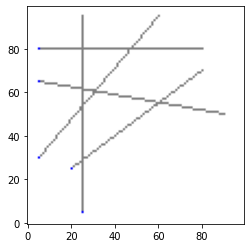

time: 28.9 s (started: 2021-03-31 05:01:47 +00:00)


In [ ]:
#trabajo
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

def ROUND(a):
	return int(a + 0.5) #x=2+0.5 y=1.4+0.5 -> 1.1
 
def drawDDA(x0,y0,x1,y1,img_draw):
  #1. identificar los diferenciales (los pixeles que van a recorrer en cada eje)
  dx = (x1-x0)
  dy = (y1-y0)

  #2. determinar el largo de la linea
  length = dx if dx > dy else dy

  #3. calcular incrementos en x & y
  ix = dx/length #1+1 = 2
  iy = dy/length #1+0.4 = 1.4

  #4. asignar los puntos de inicio
  x,y = x0,y0 #1,1

  #5. pintar el punto de inicio
  img_draw.point((ROUND(x),ROUND(y)),fill='blue')
  
  #6. aqui inicia el dibujo de los demás puntos de la linea hasta el final
  for i in range(length):
    x += ix
    y += iy
    img_draw.point((ROUND(x),ROUND(y)),fill='gray')

#aqui termina el algoritmo de DDA

#abrir el canvas creado anteriormente
img = Image.open('blank_image.jpg')

#llamar al ImageDraw de Pillow para manipular la imagen abierta 
img_draw = ImageDraw.Draw(img)

#dibujar las lineas
%timeit drawDDA(5,80,80,80, img_draw)
%timeit drawDDA(5,65,90,50, img_draw)
%timeit drawDDA(5,30,60,95, img_draw)
%timeit drawDDA(20,25,80,70, img_draw)
%timeit drawDDA(25,5,25,95, img_draw)
#guardar la imagen
img.save('dda_image.jpg')

# plotear la imagen 
plt.imshow(img,origin='lower')
